In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## <span style="font-size: 0.9em;">🟥</span> **Section 2: Mathematical Operations on Images**

### <span style="font-size: 0.9em;">🟧</span> **MinMax normalization**

In [4]:
img_eye = cv2.imread("imgs/eye.jpg", cv2.IMREAD_GRAYSCALE)
print(img_eye.min(), img_eye.max(), img_eye.dtype)

0 255 uint8


In [5]:
# (f(x,y) - min_f) / (max_f - min_f)

img_eye_normz = (img_eye - img_eye.min()) / (img_eye.max() - img_eye.min())
img_eye_normz.min(), img_eye_normz.max(), img_eye_normz.dtype

(0.0, 1.0, dtype('float64'))

In [6]:
img_eye.nbytes/1000, img_eye_normz.nbytes/1e6

(167.0, 1.336)

In [7]:
167*8

1336

In [8]:
normalizer = lambda img: (img - img.min()) / (img.max() - img.min())
normalizer(img_eye)

array([[0.60392157, 0.6       , 0.59607843, ..., 0.76470588, 0.76862745,
        0.78039216],
       [0.61176471, 0.60392157, 0.6       , ..., 0.78823529, 0.79215686,
        0.80392157],
       [0.61960784, 0.61176471, 0.60392157, ..., 0.77254902, 0.78431373,
        0.79215686],
       ...,
       [0.71372549, 0.71372549, 0.71764706, ..., 0.85882353, 0.8627451 ,
        0.8627451 ],
       [0.70980392, 0.71372549, 0.71372549, ..., 0.85882353, 0.85882353,
        0.8627451 ],
       [0.70980392, 0.71372549, 0.71372549, ..., 0.85882353, 0.85882353,
        0.85882353]])

In [9]:
cv2.imshow("", img_eye_normz)
cv2.waitKey()
cv2.destroyAllWindows()

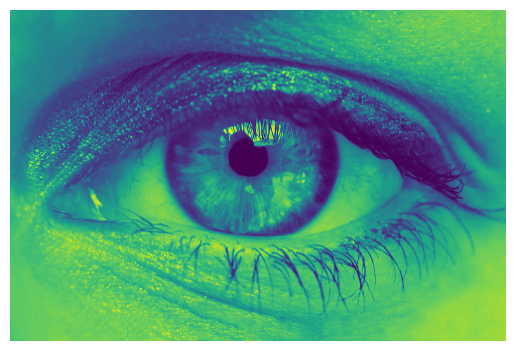

In [10]:
plt.imshow(img_eye_normz)
plt.axis('off');

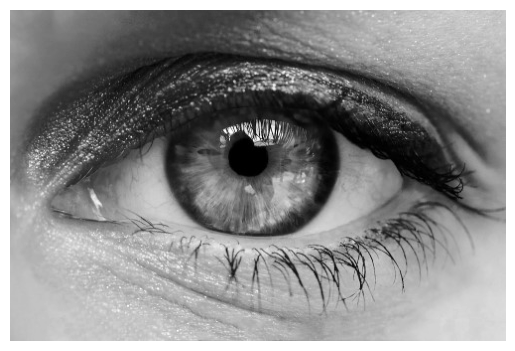

In [11]:
plt.imshow(img_eye_normz, cmap='gray')
plt.axis('off');

In [12]:
cv2.imwrite("results/eye-normz_Wrong.bmp", img_eye_normz)

True

In [13]:
img_eye_denormz = np.array(255 * img_eye_normz, dtype=np.uint8)
print(img_eye_denormz.max(), img_eye_denormz.dtype)

cv2.imwrite("results/eye-normz.bmp", img_eye_denormz)

255 uint8


True

In [14]:
cv2.imshow("WRONG USAGE, Float * 255", 255*img_eye_normz)
cv2.waitKey()
cv2.destroyAllWindows()

### <span style="font-size: 0.9em;">🟧</span> **Standardization**

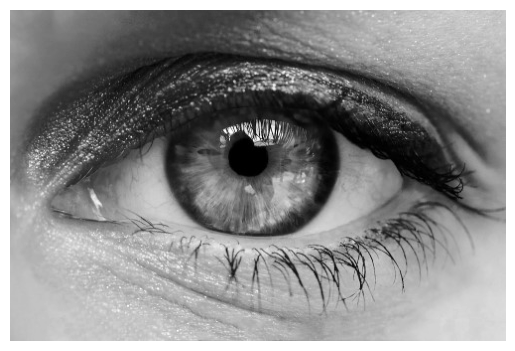

In [15]:
mean = np.mean(img_eye)
std = np.std(img_eye)
img_eye_standardized = (img_eye - mean) / std

plt.imshow(img_eye_standardized, cmap='gray')
plt.axis('off');

### <span style="font-size: 0.9em;">🟧</span> **Image blending**

In [16]:
img_eye = cv2.imread("imgs/eye.jpg")
img_eye_normz = normalizer(img_eye)

img_eye_normz /= 2
print(img_eye_normz.min(), img_eye_normz.max())

cv2.imshow("", img_eye_normz)
cv2.waitKey()
cv2.destroyAllWindows()

0.0 0.5


In [17]:
img_mask_eye = cv2.imread("imgs/eye-mask.png")
img_mask_eye_normz = normalizer(img_mask_eye)

img_blend = img_eye_normz + 0.5*img_mask_eye_normz
print(img_blend.min(), img_blend.max())
img_blend = normalizer(img_blend)
print(img_blend.min(), img_blend.max())

cv2.imshow("", img_blend)
cv2.waitKey()
cv2.destroyAllWindows()

0.0 1.0
0.0 1.0


### <span style="font-size: 0.9em;">🟧</span> **Image masking**

In [29]:
img_eye = cv2.imread("imgs/eye.jpg")
img_eye_normz = normalizer(img_eye)

img_mask_eye = cv2.imread("imgs/eye-mask.png")
img_mask_eye_normz = normalizer(img_mask_eye)

output_mask = img_eye_normz * img_mask_eye_normz

cv2.imshow("", output_mask)
cv2.waitKey()
cv2.destroyAllWindows()

### <span style="font-size: 0.9em;">🟧</span> **Motion detection**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


before normalize -0.4980392156862745 0.4352941176470588
after normalize 0.0 1.0


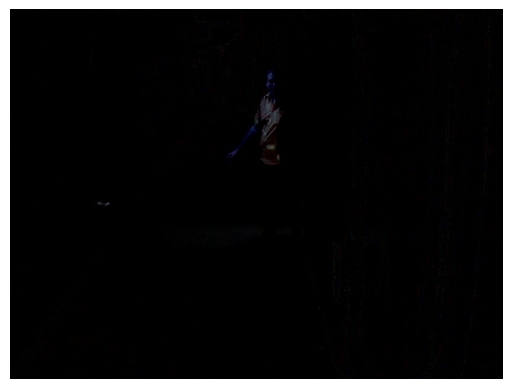

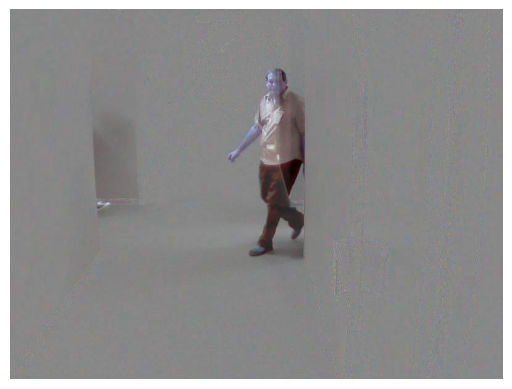

In [49]:
background = cv2.imread("imgs/background-model.jpg")
background_normz = normalizer(background)

input_stream_i = cv2.imread("imgs/input-stream.jpg")
input_stream_i_normz = normalizer(input_stream_i)

img_motion = input_stream_i_normz - background_normz


print("before normalize",img_motion.min(), img_motion.max())
plt.figure("before normalize")
plt.imshow(img_motion)
plt.axis('off');

img_motion = normalizer(img_motion)
# img_mask = img_motion > 0.4
img_mask = img_motion > 0.6

print("after normalize",img_motion.min(), img_motion.max())
plt.figure("after normalize")
plt.imshow(img_motion)
plt.axis('off');
# print(img_motion.dtype)
# img_motion = np.array(img_motion, dtype=np.float64)

img_motion *= img_mask

cv2.imshow("", img_motion)
cv2.waitKey()
cv2.destroyAllWindows()

In [50]:
img_motion.min(), img_motion.max()

(0.0, 1.0)

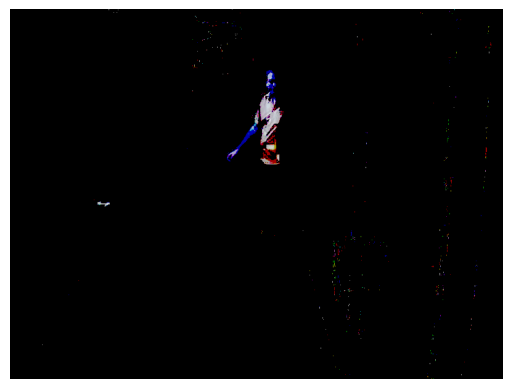

In [51]:
plt.imshow(img_motion)
plt.axis('off');

### <span style="font-size: 0.9em;">🟧</span> **Gamma transform**

In [66]:
img = cv2.imread("imgs/brightness.png")
img_normz = normalizer(img)

img_gamma1 = img_normz ** 2
print(img_gamma1.min(), img_gamma1.max())


img_gamma2 = img_normz ** 5
print(img_gamma2.min(), img_gamma2.max())

img_gamma3 = img_normz ** 0.5
print(img_gamma3.min(), img_gamma3.max())

# cv2.imshow("", img_gamma)
# cv2.waitKey()
# cv2.destroyAllWindows()

0.0 1.0
0.0 1.0
0.0 1.0


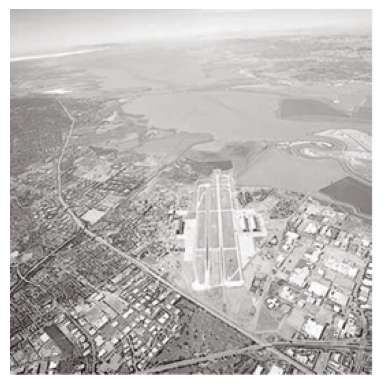

In [67]:
plt.imshow(img_normz)
plt.axis('off');

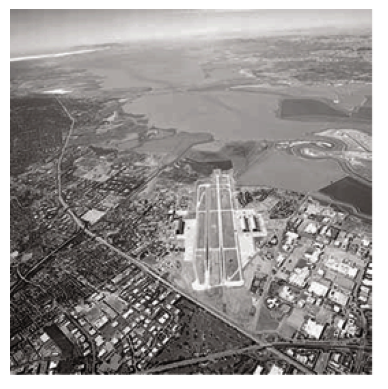

In [68]:
plt.imshow(img_gamma1)
plt.axis('off');

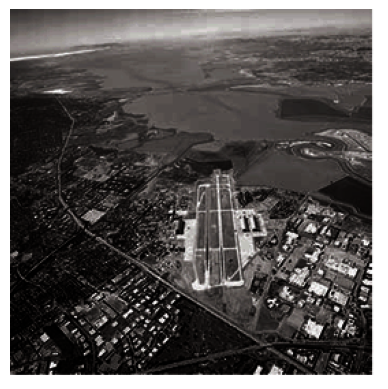

In [69]:
plt.imshow(img_gamma2)
plt.axis('off');

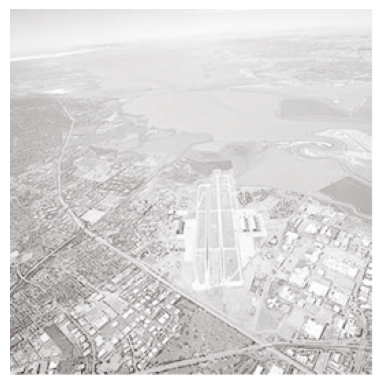

In [70]:
plt.imshow(img_gamma3)
plt.axis('off');

### <span style="font-size: 0.9em;">🟧</span> **Finding ball**

In [ ]:
#TODO

### <span style="font-size: 0.9em;">🟧</span> **Statistics**

In [23]:
img_low_cont = cv2.imread("imgs/low-contrast.tif")
# img_low_cont = normalizer(img_low_cont)

img_med_cont = cv2.imread("imgs/med-contrast.tif")
# img_med_cont = normalizer(img_med_cont)

img_high_cont = cv2.imread("imgs/high-contrast.tif")
# img_high_cont = normalizer(img_high_cont)

cv2.imshow("Low Contrast", img_low_cont)
cv2.imshow("Med Contrast", img_med_cont)
cv2.imshow("High Contrast", img_high_cont)

cv2.waitKey()
cv2.destroyAllWindows()

In [24]:
img_low_cont.min(), img_low_cont.max(), img_low_cont.mean(), img_low_cont.std()

(89, 166, 110.50460051546392, 14.292392727633565)

In [25]:
img_med_cont.min(), img_med_cont.max(), img_med_cont.mean(), img_med_cont.std()

(45, 215, 92.947558910162, 31.586540663869783)

In [26]:
img_high_cont.min(), img_high_cont.max(), img_high_cont.mean(), img_high_cont.std()

(1, 255, 75.03025957290133, 49.24272210647427)

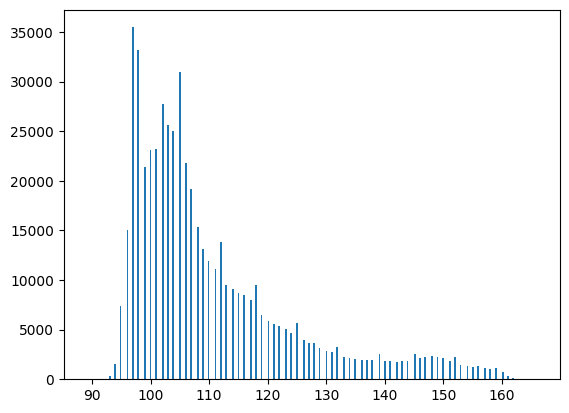

In [27]:
plt.hist(img_low_cont[..., 0].flatten(), bins=256);

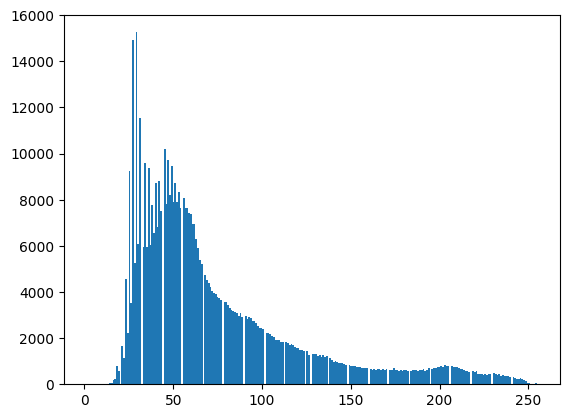

In [28]:
plt.hist(img_high_cont[..., 0].flatten(), bins=256);